In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 109394
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
1043,5fcf097e1ca3d6d064c09772,2020-12-08 06:05:02.937,2020-12-08 05:05:02.932,GCG1,SELL,2.0,1873.600000,[0000e1a7.5fcebf8e.01.01],116,577828507,EMERGENCY CLOSE,4.84,490.320000
1044,5fcf8eda5cacb85fcf238b65,2020-12-08 15:34:02.669,2020-12-08 14:34:02.654,GCG1,BUY,2.0,1877.200000,"[0000e1a7.5fcf1a82.01.01, 0000e1a7.5fcf1a83.01...",131,1554030870,ENTRY,4.84,0.000000
1045,5fcf8eda5cacb85fcf238b66,2020-12-08 15:34:02.731,2020-12-08 14:34:02.665,MGCG1,BUY,2.0,1877.200000,"[0000e1a7.5fcf1a80.01.01, 0000e1a7.5fcf1a84.01...",132,1554030874,ENTRY,0.94,0.000000
1046,5fcf9277f7a86eac9468b85c,2020-12-08 15:49:27.023,2020-12-08 14:49:27.016,MGCG1,SELL,2.0,1876.900000,[0000e1a7.5fcf254d.01.01],117,329280936,EMERGENCY CLOSE,0.94,-7.880000
1047,5fcf9277f7a86eac9468b85d,2020-12-08 15:49:27.066,2020-12-08 14:49:27.038,GCG1,SELL,2.0,1876.800000,[0000e1a7.5fcf254e.01.01],118,329280937,EMERGENCY CLOSE,4.84,-89.680000
1048,5fcfbb0cf7a86eac9468b8e0,2020-12-08 18:42:36.402,2020-12-08 17:42:36.397,ESZ0,BUY,2.0,3701.250000,[0000e1a7.5fcf55ab.01.01],135,329280941,ENTRY,4.20,0.000000
1049,5fcfbb0cf7a86eac9468b8e1,2020-12-08 18:42:36.405,2020-12-08 17:42:36.403,MESZ0,BUY,6.0,3701.250000,[0000e1a7.5fcf55ad.01.01],136,329280945,ENTRY,2.82,0.000000
1050,5fcfbeb6144eb5bf8828ec65,2020-12-08 18:58:14.431,2020-12-08 17:58:14.416,MESZ0,SELL,6.0,3700.500000,[0000e1a7.5fcf5867.01.01],117,442482347,EMERGENCY CLOSE,2.82,-28.140000
1051,5fcfbeb6144eb5bf8828ec66,2020-12-08 18:58:14.480,2020-12-08 17:58:14.476,ESZ0,SELL,2.0,3700.500000,[0000e1a7.5fcf5868.01.01],118,442482348,EMERGENCY CLOSE,4.20,-83.400000
1052,5fcfc320144eb5bf8828ec69,2020-12-08 19:17:04.524,2020-12-08 18:17:04.376,ESZ0,BUY,2.0,3702.000000,[0000e1a7.5fcf5b9d.01.01],135,442482351,ENTRY,4.20,0.000000


In [3]:
df[df.reason.str.startswith('MANUAL')]

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
372,5f48024d0b06e6e56accaabb,2020-08-27 20:58:21.765,2020-08-27 18:58:21.760,NQU0,SELL,1.0,11961.75,[0000e1a7.5f47e774.01.01],-3,2141716104,MANUAL TRADE,2.10,0.000000
373,5f48027e0b06e6e56accaabc,2020-08-27 20:59:10.623,2020-08-27 18:59:10.619,NQU0,BUY,1.0,11961.00,[0000e1a7.5f47e791.01.01],-4,2141716114,MANUAL TRADE,2.10,10.800000
404,5f525a98f2a5ab6f74f19b3e,2020-09-04 17:17:44.300,2020-09-04 15:17:44.298,NQU0,SELL,1.0,11320.75,[0000e1a7.5f526f0b.01.01],-4,1940011984,MANUAL TRADE,2.10,0.000000
432,5f7d98e9140b04161c23105c,2020-10-07 12:31:05.067,2020-10-07 10:31:05.065,NQZ0,SELL,1.0,11319.00,[0000e1a7.5f7d1bd9.01.01],-4,533904426,MANUAL TRADE,2.10,-169.200000
970,5fbd0c57c21ba5394e93fb44,2020-11-24 14:36:23.848,2020-11-24 13:36:23.761,NQZ0,SELL,1.0,11948.00,[0000e1a7.5fbc8148.01.01],-4,2103638202,MANUAL TRADE,2.10,-44.200000
971,5fbd0dfac21ba5394e93fb4b,2020-11-24 14:43:22.295,2020-11-24 13:43:22.294,NQZ0,SELL,1.0,11950.25,[0000e1a7.5fbc8227.01.01],-5,2103638208,MANUAL TRADE,2.10,-9.200000
972,5fbd10a6c21ba5394e93fb52,2020-11-24 14:54:46.061,2020-11-24 13:54:45.970,NQZ0,SELL,2.0,11954.25,[0000e1a7.5fbc837d.01.01],-6,2103638214,MANUAL TRADE,4.20,-78.400000
973,5fbd173fc21ba5394e93fb69,2020-11-24 15:22:55.695,2020-11-24 14:22:55.692,NQZ0,SELL,1.0,11956.00,[0000e1a7.5fbc8899.01.01],-7,2103638227,MANUAL TRADE,2.10,-24.200000
1014,5fc8d618059c19e3a5767e13,2020-12-03 13:12:08.018,2020-12-03 12:12:08.016,MNQZ0,SELL,1.0,12482.00,[0000e1a7.5fc84637.01.01],-4,1146587570,MANUAL TRADE,0.47,-6.440000
1015,5fc8d7a8059c19e3a5767e14,2020-12-03 13:18:48.176,2020-12-03 12:18:48.174,NQZ0,SELL,1.0,12482.00,[0000e1a7.5fc8467d.01.01],-5,1146587574,MANUAL TRADE,2.10,-14.200000


In [4]:
df[df.realizedPNL>0].realizedPNL.count()

186

In [5]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [6]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [7]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [8]:
df.groupby('contract').realizedPNL.sum()

contract
ES      751.710000
GC     3413.260001
NQ    14684.080011
YM     5484.419999
Name: realizedPNL, dtype: float64

In [9]:
df.realizedPNL.sum()

24333.470010999994

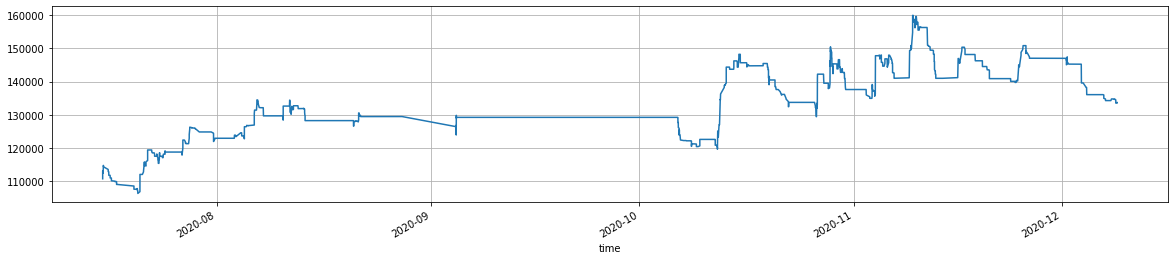

In [10]:
df.cash.plot(figsize=(20,4), grid=True);

In [11]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [12]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES    116
 GC    210
 NQ    600
 YM    147
 Name: action, dtype: int64,
 1073)

In [13]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.094340
 GC    1.981132
 NQ    5.660377
 YM    1.386792
 Name: action, dtype: float64,
 10.122641509433961)

In [14]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     319.99
GC     573.17
NQ    1730.19
YM     422.65
Name: commission, dtype: float64

In [15]:
df.commission.sum()

3046.0

In [16]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.33,70.36,1403.85,-583.32,2.41,72.45,81.2
NQ,0.37,30.25,1039.08,-560.01,1.86,31.65,334.8
ES,0.30,156.57,1914.71,-609.79,3.14,147.56,50.1
GC,0.33,57.51,1306.57,-567.02,2.30,51.26,90.7
total,0.35,54.51,1217.03,-570.44,2.13,55.17,556.8


In [17]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [18]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.018720,0.142679,0.350767,0.468845
GC,0.018720,1.000000,-0.064368,0.014074,0.245888
NQ,0.142679,-0.064368,1.000000,0.302546,0.832520
YM,0.350767,0.014074,0.302546,1.000000,0.647375
total,0.468845,0.245888,0.832520,0.647375,1.000000


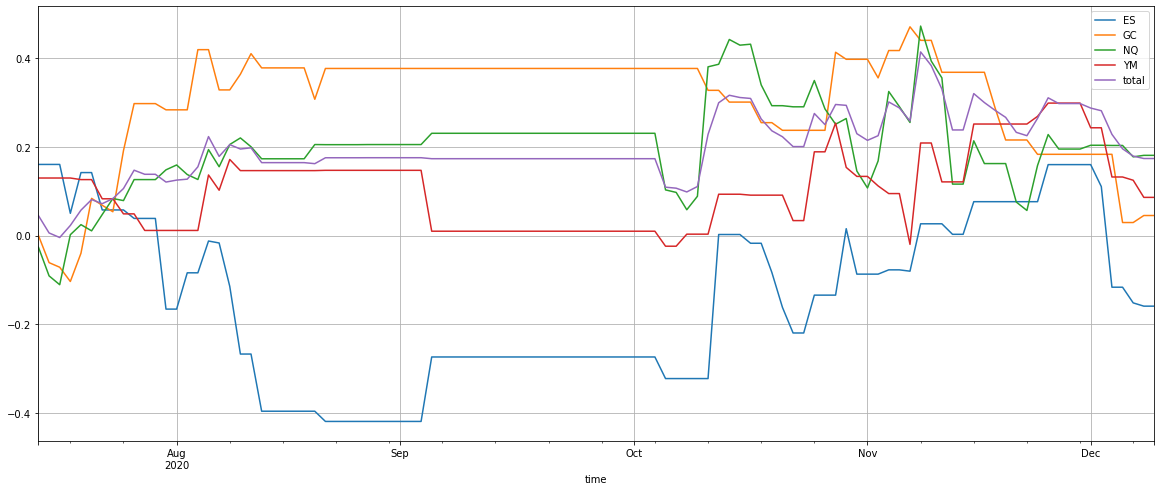

In [19]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

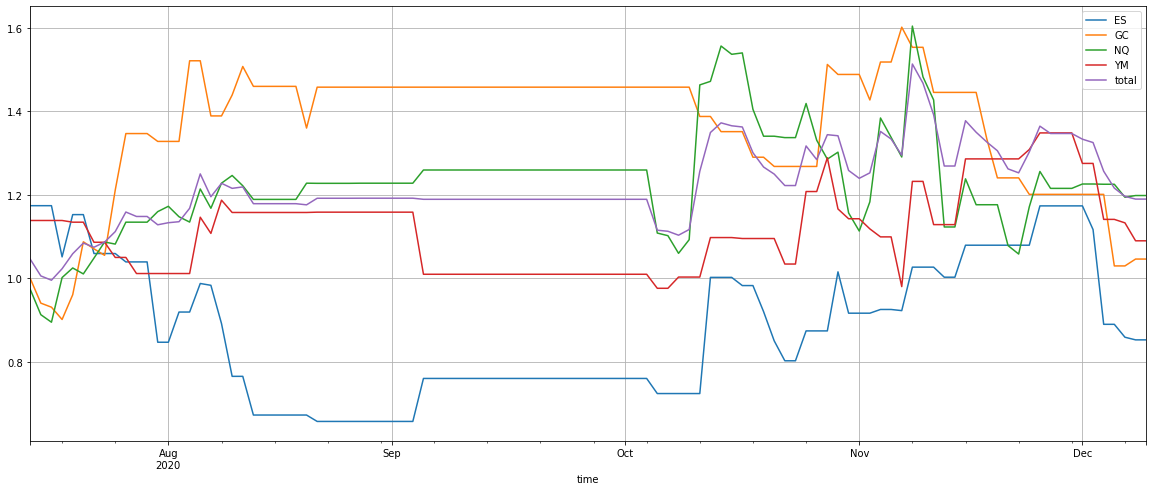

In [20]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [21]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.315280,0.113229,0.537088,0.226955,0.511228
Cumulative returns,-0.147271,0.046153,0.198207,0.089844,0.189686
Annual volatility,1.040254,0.682025,0.967683,0.761727,0.547551
Sharpe ratio,0.125633,0.483379,0.896299,0.625882,1.016590
Calmar ratio,-0.716695,0.317257,1.578687,0.948542,2.392382
Stability,0.067900,0.000461,0.164275,0.136941,0.535019
Max drawdown,-0.439909,-0.356901,-0.340212,-0.239267,-0.213690
Omega ratio,1.037857,1.146503,1.259364,1.212383,1.258152
Sortino ratio,0.207798,0.847390,1.628021,1.159366,1.902695
Skew,1.717301,1.442809,1.873498,1.986912,1.614085


In [22]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-15.29,32.77,15.97,1.15,12.82
2020-08-31,-22.38,9.78,5.87,14.52,5.64
2020-09-30,15.65,0.00,2.57,-12.83,-0.22
2020-10-31,20.54,2.09,-8.16,13.16,5.81
2020-11-30,28.02,-19.29,5.08,17.98,7.03
2020-12-31,-27.33,-12.89,-1.41,-19.16,-11.66


In [23]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -15.0
GC        5.0
NQ       20.0
YM        9.0
total    19.0
dtype: float64

In [24]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-11-04 03:14:38.840,NQ,SELL,11651.500000,11506.6
2020-11-09 01:36:53.379,NQ,SELL,12311.000000,8236.6
2020-11-16 01:46:56.858,NQ,SELL,12030.000000,5747.4
2020-07-20 22:44:06.883,NQ,SELL,10934.000000,5180.8
2020-10-12 08:41:25.532,NQ,SELL,11849.250000,5112.4
...,...,...,...,...
2020-10-28 20:12:43.602,NQ,BUY,11168.583333,-2327.6
2020-07-31 13:39:29.153,ES,SELL,3245.250000,-2408.4
2020-11-20 14:00:34.667,NQ,SELL,11976.416667,-2492.6


In [25]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-11-09,0.112801,-0.030102,0.242791,0.256893,0.168667
2020-10-12,0.000000,-0.048118,0.339078,0.000000,0.124805
2020-11-16,0.076374,0.000000,0.102596,0.139371,0.085428
2020-11-04,0.009712,0.063649,0.169632,-0.017112,0.079110
2020-10-26,0.089103,0.000000,0.061112,0.167803,0.077534
...,...,...,...,...,...
2020-11-11,0.000000,-0.069488,-0.037141,-0.083980,-0.051486
2020-12-03,-0.203049,0.000000,-0.000472,-0.105058,-0.051834
2020-10-30,-0.097425,0.000000,-0.111733,-0.020080,-0.061892
